In [1]:
import shutil 
import glob 
import os

In [2]:
# import shutil 
# import glob 

image_dir = "/home/anhp/Documents/coding/analysis/10/image/night/car"
image_target = "/home/anhp/Documents/coding/analysis/10/image/test"

image_names = os.listdir(image_dir)

i = 0 
for image_name in image_names:
    if "id" not in image_name:
        shutil.copy(os.path.join(image_dir, image_name), os.path.join(image_target, image_name))
        i += 1
    if i == 100:
        break

In [8]:
image_dir = "/home/anhp/Documents/coding/analysis/10/image/night/car"
image_target = "/home/anhp/Documents/coding/analysis/10/image/night/test100"

image_names = os.listdir(image_dir)

In [9]:
def checkIfDuplicates_1(listOfElems):
    ''' Check if given list contains any duplicates '''
    if len(listOfElems) == len(set(listOfElems)):
        print(len(listOfElems))
        return False
    else:
        return True

In [12]:
def checkIfDuplicates_2(listOfElems):
    ''' Check if given list contains any duplicates '''    
    setOfElems = set()
    for elem in listOfElems:
        if elem in setOfElems:
            return True
        else:
            setOfElems.add(elem)         
    return False

In [14]:
#result = checkIfDuplicates_1(image_names)
result = checkIfDuplicates_2(image_names)
if result:
    print('Yes, list contains duplicates')
else:
    print('No duplicates found in list')    

No duplicates found in list


In [15]:
image_names

['89A20446.png',
 '0000000709.png',
 '0000000049.png',
 '0000000282.png',
 '0000000209.png',
 '0000000437.png',
 '30E00644.png',
 '0000000581_1.png',
 '99A21478.png',
 '0000000554.png',
 '0000000781.png',
 '0000000810.png',
 '0000000492.png',
 '0000000988.png',
 '0000000402.png',
 '0000000229.png',
 '0000000509.png',
 '0000000264 _1.png',
 '0000000519.png',
 '0000000573.png',
 '0000000706.png',
 '0000000526_1.png',
 '0000000503_1.png',
 '99A18075.png',
 '0000000263.png',
 '0000000032.png',
 '0000000940.png',
 '0000000347.png',
 '0000000012.png',
 '0000000630.png',
 '0000000313.png',
 '98A37550.png',
 '99A4114.png',
 '30G08620.png',
 '0000000576.png',
 '0000000881.png',
 '0000000700.png',
 '0000000466.png',
 '0000000121.png',
 '30G25088.png',
 '69A19494.png',
 '0000000664.png',
 '0000000337.png',
 '0000000044.png',
 '0000000318.png',
 '0000000240.png',
 '0000000210_1.png',
 '0000000542.png',
 '0000000452.png',
 '99A27542.png',
 '0000000784.png',
 '0000000696.png',
 '0000000751.png',
 '0

In [3]:
# import glob 
# import os
image_target = "/home/anhp/Documents/coding/analysis/10/image/night/car"
new_dir = "/home/anhp/Documents/coding/analysis/10/image/test"

image_dirs = sorted(glob.glob(image_target+"/*.png"),key=os.path.basename)

new_image_dirs = []

for img_dir in image_dirs: 
    
    img_name = img_dir.split("/")[-1]
    new_img_dir = os.path.join(new_dir, img_name)
    #print(new_img_dir)
    new_image_dirs.append(new_img_dir)


print(len(new_image_dirs))
print(new_image_dirs)

438
['/home/anhp/Documents/coding/analysis/10/image/test/0000000001.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000001_1.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000005.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000007.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000007_1.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000008.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000008_1.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000012.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000016.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000017.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000019.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000020.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000022.png', '/home/anhp/Documents/coding/analysis/10/image/test/0000000024.png', '/home/anhp/Documents/c

In [100]:
import json

#print(new_image_dirs)

y = []

with open("/home/huy/Desktop/tuananh/code/demo_lpr/label_cary.txt","r") as f:
    # lines = 1 annotation cua 1 anh'   
    lines = f.readlines()
    # print(len(lines))
    # print(len(new_image_dirs))
    for line in lines:
        # cast sang dictionary
        datas = json.loads(line)

        # print(type(datas))
        # print(datas)
        # break 

        # lay image path cua cua file annotation
        img_path = datas.get("imagePath")
        
        # neu image path trung voi 100 anh thi append vao mot list
        if img_path in new_image_dirs:
            y.append(datas)
     
with open('/home/huy/Desktop/tuananh/code/demo_lpr/label_cary.json','w') as outfile:                
    json.dump(y, outfile)
               

In [4]:
# lay duong dan anh va thong tin bounding box 

import json 
import os 
import image_quality_accessment 
import cv2 
import pandas as pd 

image_target = "/home/huy/Desktop/tuananh/code/demo_lpr/image/night/test_lpr"
f = open("label_cary.json","r")

datas = json.loads(f.read())
 
points_dict = {}
image_heights, image_widths, image_paths = [], [], []

brightness, sharpness, contrast = [], [], [] 

points1, points2, points3, points4 = [], [], [], []

w_boxs, h_boxs = [], [] 
OCR_license_plate = []
for data in datas:    
    
    img_path = data.get("imagePath")
    img_name = img_path.split("/")[-1]
    
    if "@" in img_name:
        OCR_license_plate.append(img_name.split("@")[0])
    else:
        OCR_license_plate.append(img_name.split("-")[0])
    # get image path
    new_img_path = os.path.join(image_target, img_name)
    image_paths.append(new_img_path) 

    shape_dict = data.get("shapes")
    
    # get image height
    image_height = data.get("imageHeight")
    image_heights.append(image_height)

    # get image width
    image_width = data.get("imageWidth")
    image_widths.append(image_width) 
    
    # get points information
    points = shape_dict[0].get("points")

    points1.append(points[0])
    points2.append(points[1])
    points3.append(points[2])
    points4.append(points[3])
    # calculate IQA metrics
    image = cv2.imread(new_img_path)
    IQA = image_quality_accessment.ImageQualityAssessment(image)

    brightness.append(IQA.brightness())
    sharpness.append(IQA.sharpness())
    contrast.append(IQA.contrast())

    # calculate w,h bounding boxes
    xtl = min(points[0][0],points[3][0])
    ytl = min(points[0][1],points[3][1])
    xbr = max(points[1][0],points[2][0])
    ybr = max(points[1][1],points[2][1])    

    w_box = xbr - xtl
    w_boxs.append(w_box)

    h_box = ybr - ytl 
    h_boxs.append(h_box)

bboxes_info_dict = {
    "Image path": image_paths,
    "w": image_widths,
    "h": image_heights,
    "w_box": w_boxs,
    "h_box": h_boxs,
    "points 1": points1,
    "points 2": points2,
    "points 3": points3,
    "points 4": points4,
    "Brightness": brightness,
    "Sharpness": sharpness,
    "Contrast": contrast, 
    "OCR License plate": OCR_license_plate
}

bboxes_info_dframe = pd.DataFrame.from_dict(bboxes_info_dict)
bboxes_info_dframe.head()


Image path    w    h  w_box  h_box  \
0  /home/huy/Desktop/tuananh/code/demo_lpr/image/...  777  369     93     74   
1  /home/huy/Desktop/tuananh/code/demo_lpr/image/...  462  408     82     61   
2  /home/huy/Desktop/tuananh/code/demo_lpr/image/...  653  399     88     68   
3  /home/huy/Desktop/tuananh/code/demo_lpr/image/...  663  503    111     70   
4  /home/huy/Desktop/tuananh/code/demo_lpr/image/...  699  515    110     72   

     points 1    points 2    points 3    points 4  Brightness  Sharpness  \
0  [213, 236]  [212, 301]  [306, 310]  [307, 244]    0.559115  18.797234   
1    [8, 208]   [11, 266]   [90, 262]   [87, 205]    0.406450  16.884268   
2  [197, 268]  [197, 329]  [285, 336]  [286, 275]    0.493991  17.399166   
3  [230, 413]  [234, 481]  [341, 479]  [337, 411]    0.538147  25.771221   
4  [224, 409]  [226, 480]  [334, 480]  [332, 408]    0.349405  15.688278   

    Contrast OCR License plate  
0  56.195206          25A03683  
1  41.728171          29A17972  
2  47.684576          99A21840  
3  60.774190          99A09715  
4  39.384986          99A28828

In [5]:
bboxes_info_dframe.head()

Image path    w    h  w_box  h_box  \
0  /home/huy/Desktop/tuananh/code/demo_lpr/image/...  777  369     93     74   
1  /home/huy/Desktop/tuananh/code/demo_lpr/image/...  462  408     82     61   
2  /home/huy/Desktop/tuananh/code/demo_lpr/image/...  653  399     88     68   
3  /home/huy/Desktop/tuananh/code/demo_lpr/image/...  663  503    111     70   
4  /home/huy/Desktop/tuananh/code/demo_lpr/image/...  699  515    110     72   

     points 1    points 2    points 3    points 4  Brightness  Sharpness  \
0  [213, 236]  [212, 301]  [306, 310]  [307, 244]    0.559115  18.797234   
1    [8, 208]   [11, 266]   [90, 262]   [87, 205]    0.406450  16.884268   
2  [197, 268]  [197, 329]  [285, 336]  [286, 275]    0.493991  17.399166   
3  [230, 413]  [234, 481]  [341, 479]  [337, 411]    0.538147  25.771221   
4  [224, 409]  [226, 480]  [334, 480]  [332, 408]    0.349405  15.688278   

    Contrast OCR License plate  
0  56.195206          25A03683  
1  41.728171          29A17972  
2  47.684576          99A21840  
3  60.774190          99A09715  
4  39.384986          99A28828

<AxesSubplot:ylabel='Brightness'>

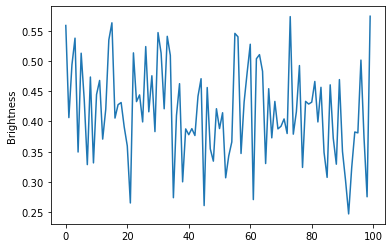

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy.stats import norm
# bboxes_info_dframe.keys()
sns.lineplot(y="Brightness",x=bboxes_info_dframe.index,data=bboxes_info_dframe)
#plt.plot(bboxes_info_dframe['Brightness'])

<AxesSubplot:ylabel='Contrast'>

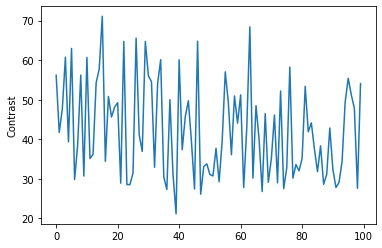

In [19]:
#sns.displot(bboxes_info_dframe['Sharpness'], kde=True, bins=12) 
sns.lineplot(y="Contrast",x=bboxes_info_dframe.index,data=bboxes_info_dframe)


<AxesSubplot:ylabel='Sharpness'>

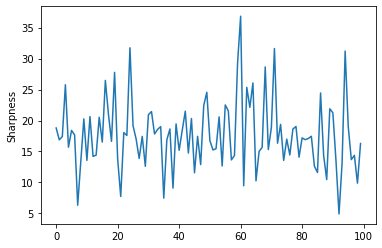

In [21]:
sns.lineplot(y="Sharpness",x=bboxes_info_dframe.index,data=bboxes_info_dframe)


In [63]:
bboxes_info_dframe['Sharpness'][80:]

80    17.193647
81    16.905571
82    17.088482
83    17.457232
84    12.613750
85    11.608952
86    24.448635
87    14.342819
88    10.457792
89    21.890477
90    21.242693
91    13.629265
92     4.913805
93    13.100238
94    31.210666
95    19.054563
96    13.683280
97    14.366228
98     9.883742
99    16.285203
Name: Sharpness, dtype: float64

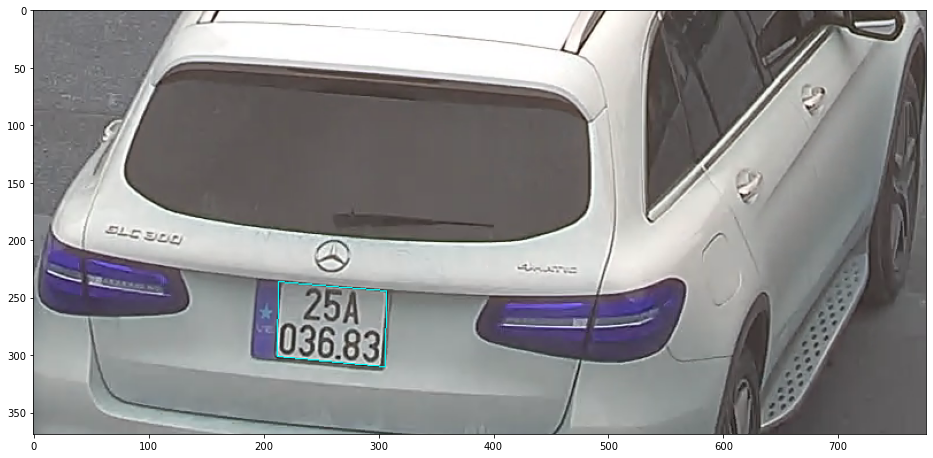

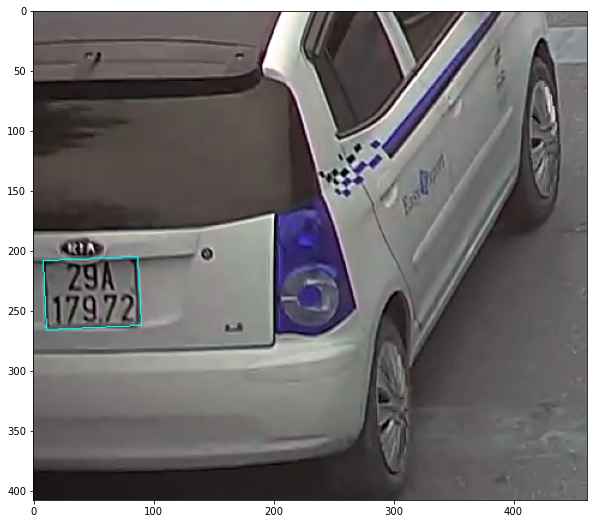

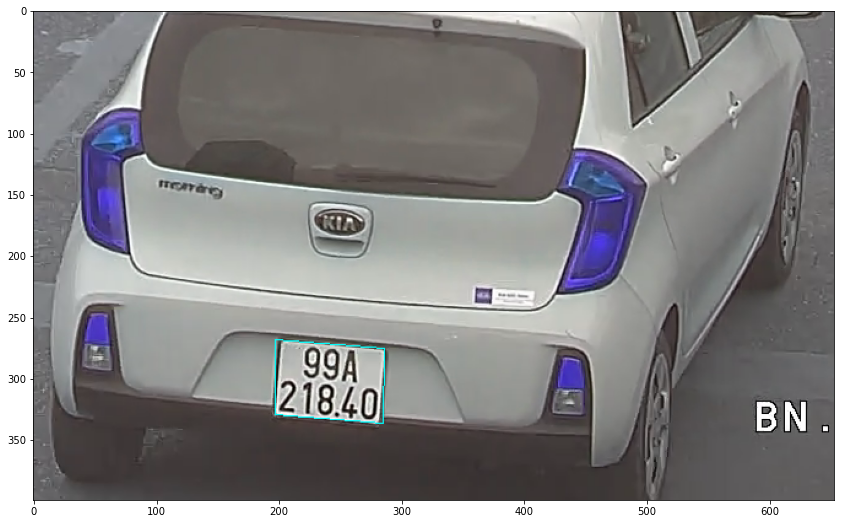

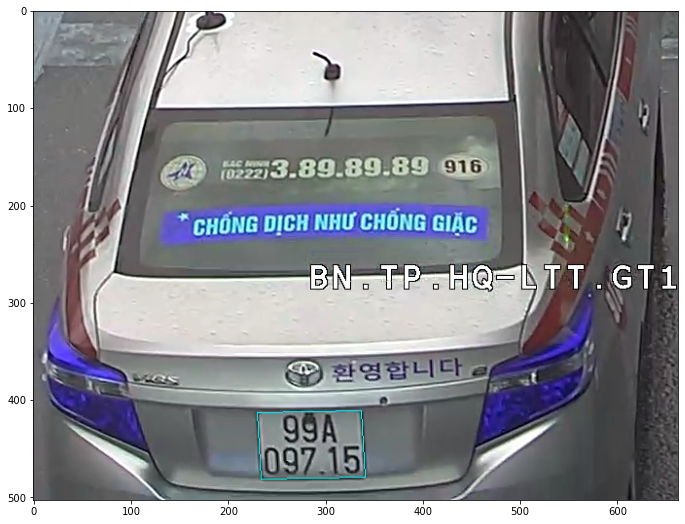

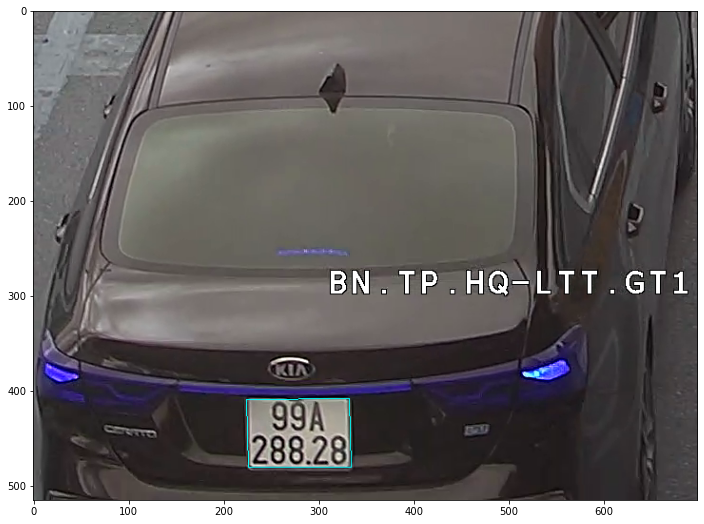

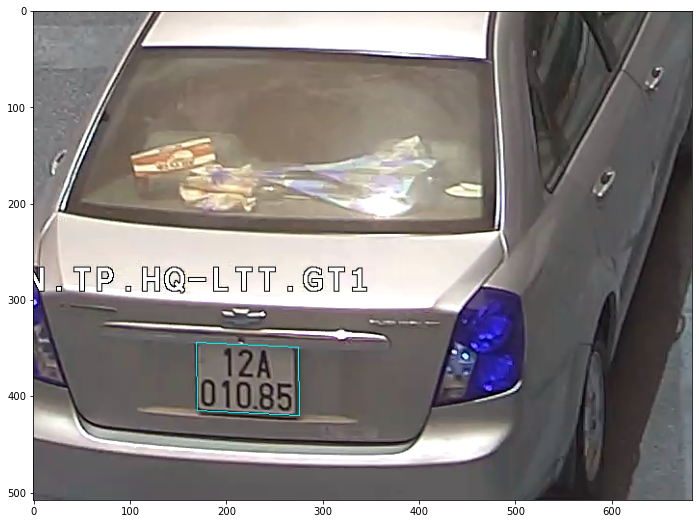

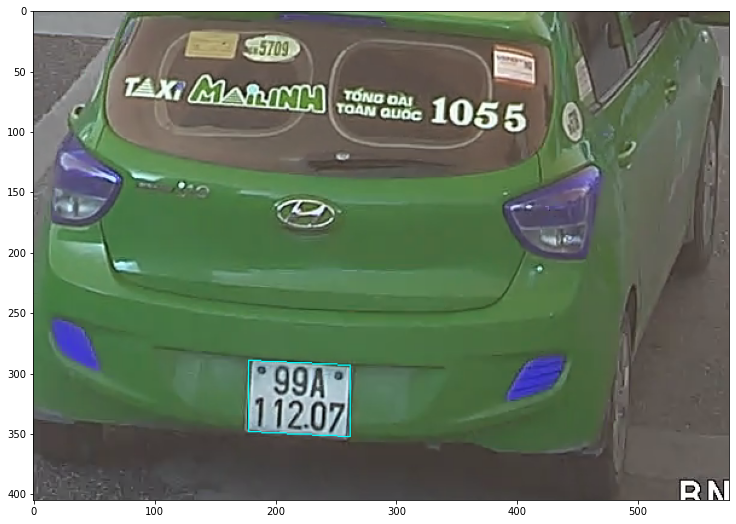

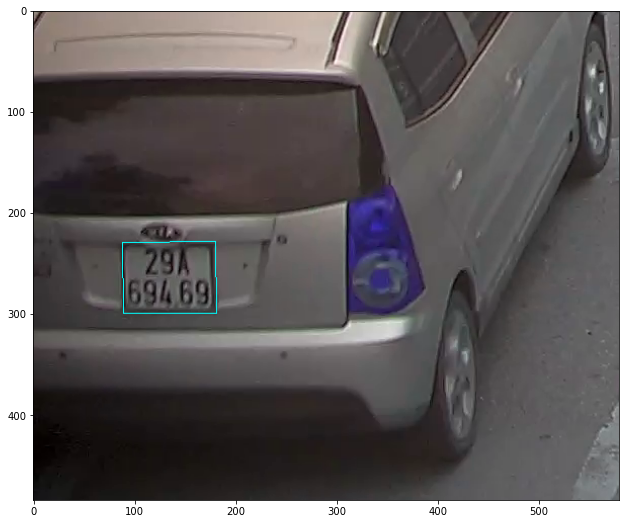

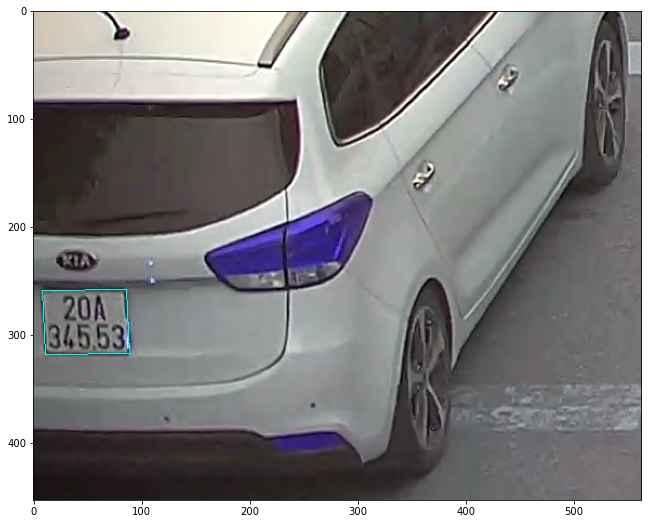

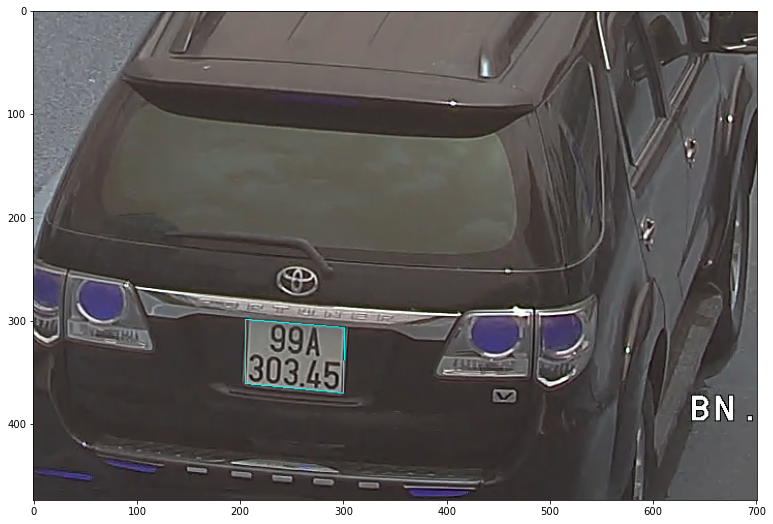

In [2]:
# draw image and bounding box: 
from PIL import Image, ImageDraw
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
i = 0
for x,y in points_dict.items():
    i += 1
    sample_image = cv2.imread(x)

    pts = np.array(y, np.int32)
    pts = pts.reshape((-1,1,2))

    ff = plt.figure(figsize=(16,9))
    plt.imshow(cv2.polylines(sample_image,[pts],True,(0,255,255)))

    if i == 10:
        break

In [12]:
import cv2 
# calculate w, h
img_paths = [] 
w_boxs = []
h_boxs = [] 
 

i = 0
for img_path,points in points_dict.items():

    img_paths.append(img_path)
    
    xtl = min(points[0][0],points[3][0])
    ytl = min(points[0][1],points[3][1])
    xbr = max(points[1][0],points[2][0])
    ybr = max(points[1][1],points[2][1])
    
    # draw rectangle: 
    # i += 1
    # sample_image = cv2.imread(img_path)
    # ff = plt.figure(figsize=(16,9))
    # plt.imshow(cv2.rectangle(sample_image,(xtl,ytl),(xbr,ybr),(255,0,255)))
    
    # if i == 10:
    #     break

    w_box = xbr - xtl
    w_boxs.append(w_box)

    h_box = ybr - ytl 
    h_boxs.append(h_box)

    size_box = w_box * h_box
    size_boxs.append(size_box)

bboxes_info_dict = {
    "Image names":img_names,
    "w":image_widths,
    "h":image_heights,
    "w_box":w_boxs,
    "h_box":h_boxs,
    "size_box":size_boxs
}



In [13]:
import pandas as pd 

bboxes_info_dframe = pd.DataFrame.from_dict(bboxes_info_dict)

bboxes_info_dframe.head()
bboxes_info_dframe.describe()

w_box       h_box     size_box
count  100.000000  100.000000   100.000000
mean    94.600000   60.200000  5828.740000
std     23.755488   16.864882  2020.874601
min     32.000000   16.000000   672.000000
25%     84.000000   56.750000  5238.000000
50%     92.500000   67.500000  6370.000000
75%    107.000000   71.250000  7233.000000
max    160.000000   78.000000  8320.000000